In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

%matplotlib inline

In [4]:
facebook = pd.read_csv(
    "data/facebook_combined.txt",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [5]:
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

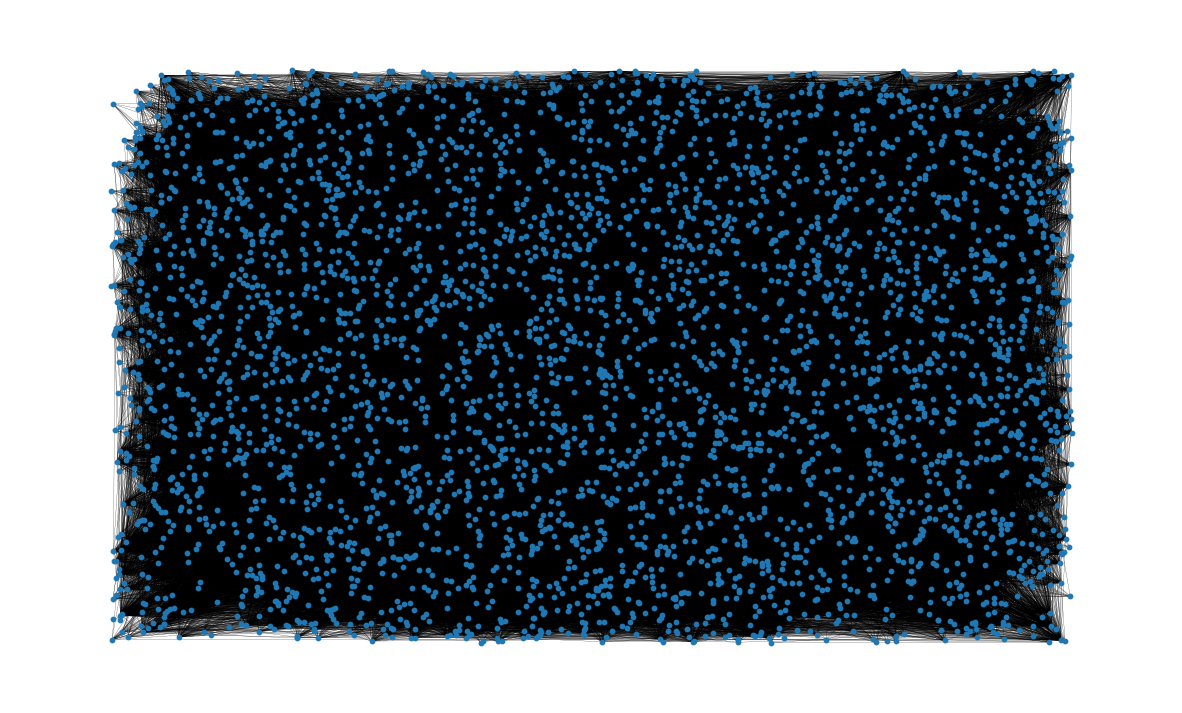

In [6]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

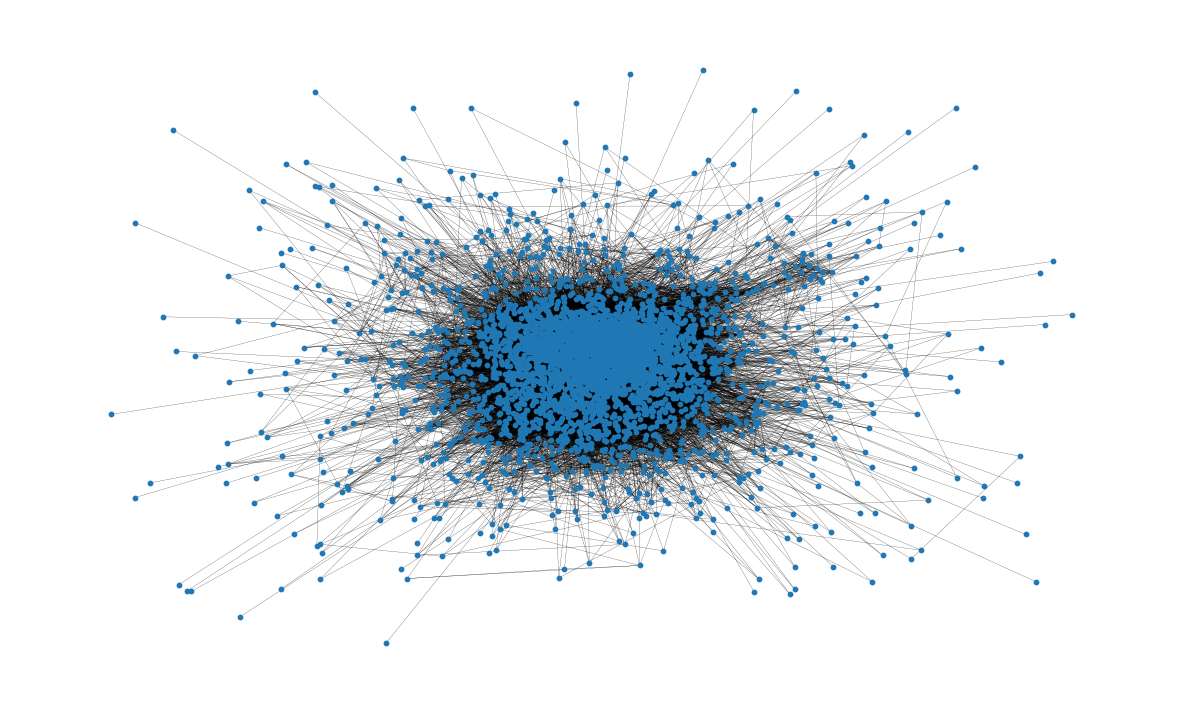

In [11]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [8]:
G.number_of_nodes()

4039

In [12]:
G.number_of_edges()

88234

In [18]:
G.degree()

DegreeView({0: 347, 1: 17, 2: 10, 3: 17, 4: 10, 5: 13, 6: 6, 7: 20, 8: 8, 9: 57, 10: 10, 11: 1, 12: 1, 13: 31, 14: 15, 15: 1, 16: 9, 17: 13, 18: 1, 19: 16, 20: 15, 21: 65, 22: 11, 23: 17, 24: 16, 25: 69, 26: 68, 27: 5, 28: 13, 29: 13, 30: 17, 31: 23, 32: 6, 33: 2, 34: 5, 35: 2, 36: 11, 37: 1, 38: 9, 39: 15, 40: 44, 41: 24, 42: 2, 43: 1, 44: 6, 45: 12, 46: 5, 47: 2, 48: 22, 49: 4, 50: 11, 51: 7, 52: 2, 53: 31, 54: 8, 55: 17, 56: 78, 57: 15, 58: 12, 59: 19, 60: 8, 61: 3, 62: 26, 63: 6, 64: 7, 65: 12, 66: 15, 67: 76, 68: 9, 69: 10, 70: 2, 71: 3, 72: 24, 73: 10, 74: 1, 75: 14, 76: 3, 77: 6, 78: 9, 79: 12, 80: 23, 81: 3, 82: 34, 83: 7, 84: 13, 85: 14, 86: 6, 87: 13, 88: 20, 89: 8, 90: 2, 91: 8, 92: 21, 93: 8, 94: 22, 95: 6, 96: 9, 97: 3, 98: 49, 99: 13, 100: 9, 101: 19, 102: 6, 103: 16, 104: 32, 105: 14, 106: 8, 107: 1045, 108: 13, 109: 37, 110: 5, 111: 14, 112: 3, 113: 40, 114: 1, 115: 21, 116: 17, 117: 6, 118: 36, 119: 62, 120: 4, 121: 12, 122: 63, 123: 18, 124: 4, 125: 4, 126: 7, 127: 16

In [17]:
np.mean([d for _, d in G.degree()])

np.float64(43.69101262688784)

In [19]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [22]:
shortest_path_lengths[3000][42]

4

In [23]:
# This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
# reusing the pre-computed shortest path lengths!
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
diameter

8

In [27]:
# Compute the average shortest path length for each node
average_path_lengths = [
    np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
]
average_path_lengths

[np.float64(2.82941322109433),
 np.float64(3.8249566724436743),
 np.float64(3.8266897746967072),
 np.float64(3.8249566724436743),
 np.float64(3.8266897746967072),
 np.float64(3.8259470165882643),
 np.float64(3.827680118841297),
 np.float64(3.6385243872245607),
 np.float64(3.8271849467690022),
 np.float64(3.815053230997772),
 np.float64(3.8266897746967072),
 np.float64(3.828918049022035),
 np.float64(3.828918049022035),
 np.float64(3.8214904679376085),
 np.float64(3.8254518445159693),
 np.float64(3.828918049022035),
 np.float64(3.8269373607328547),
 np.float64(3.8259470165882643),
 np.float64(3.828918049022035),
 np.float64(3.825204258479822),
 np.float64(3.8254518445159693),
 np.float64(3.6273830155979203),
 np.float64(3.8264421886605597),
 np.float64(3.8249566724436743),
 np.float64(3.825204258479822),
 np.float64(3.812082198564001),
 np.float64(3.8123297846001485),
 np.float64(3.8279277048774447),
 np.float64(3.8259470165882643),
 np.float64(3.8259470165882643),
 np.float64(3.8249566

In [26]:
# The average over all nodes
np.mean(average_path_lengths)

np.float64(3.691592636562027)

Text(0, 0.5, 'Frequency (%)')

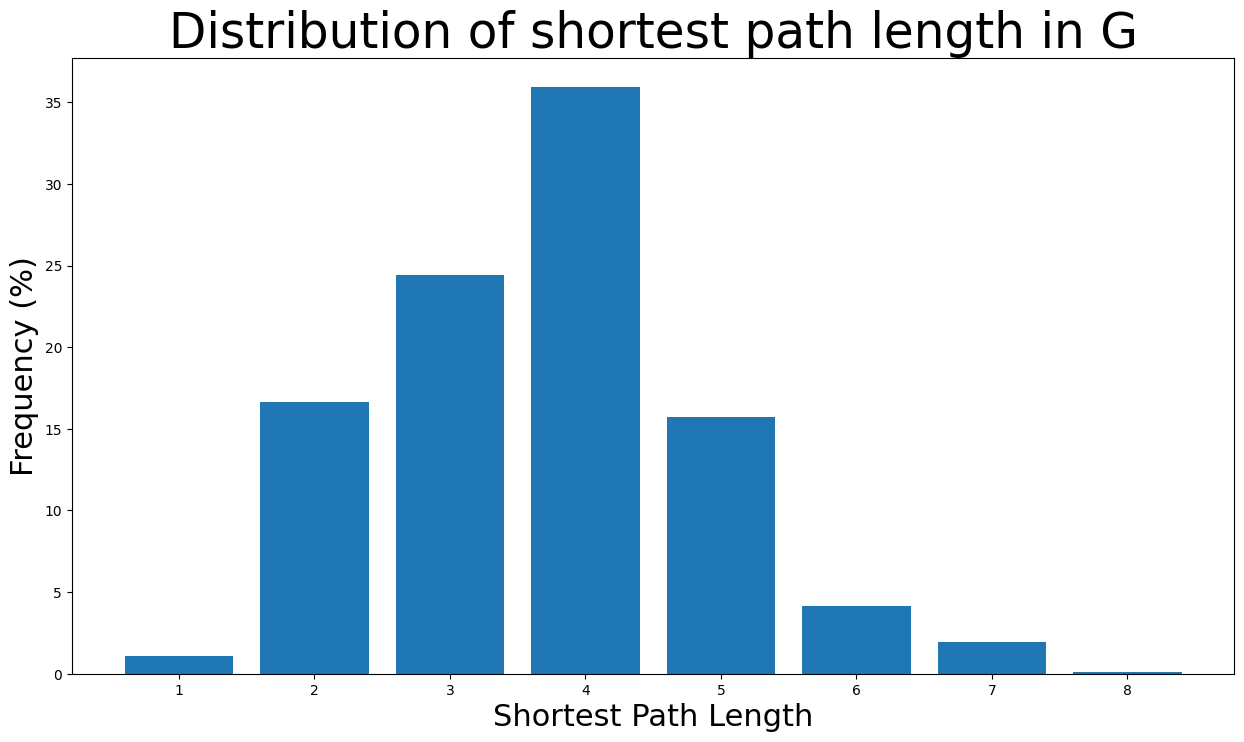

In [28]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in G", fontdict={"size": 35}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})

In [31]:
# total number of edges by total number of possible edges
nx.density(G)

0.010819963503439287

In [ ]:
# how many distinct connected components are in the graph
nx.number_connected_components(G)

1

In [34]:
degree_centrality = nx.centrality.degree_centrality(
    G
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(107, 0.258791480931154),
 (1684, 0.1961367013372957),
 (1912, 0.18697374938088163),
 (3437, 0.13546310054482416),
 (0, 0.08593363051015354),
 (2543, 0.07280832095096582),
 (2347, 0.07206537890044576),
 (1888, 0.0629024269440317)]